In [18]:
!pip install mplfinance

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc

In [79]:
# Importing our data
data = pd.read_csv('/Users/soroushesnaashari/Documents/Preparing/Market/Market.csv', encoding='unicode_escape')
market_data = data.copy()
market_data

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,5/27/2021,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,5/28/2021,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,5/31/2021,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,6/1/2021,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [80]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110252 non-null  float64
 4   Low        110251 non-null  float64
 5   Close      110250 non-null  float64
 6   Adj Close  110244 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [81]:
# Filter rows where Index is "NYA"
nya_data = market_data[market_data['Index'] == "NYA"].copy()
# Remove the decimals
nya_data = round(nya_data)
# Drop the "Index" and "Volume" columns
nya_data = nya_data.drop(columns = ["Index", "Volume"])
# Removing the missing values
nya_data = nya_data.dropna()
nya_data

,Date,Open,High,Low,Close,Adj Close
0,12/31/1965,529.0,529.0,529.0,529.0,529.0
1,1/3/1966,527.0,527.0,527.0,527.0,527.0
2,1/4/1966,528.0,528.0,528.0,528.0,528.0
3,1/5/1966,531.0,531.0,531.0,531.0,531.0
4,1/6/1966,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...,...
13943,5/24/2021,16375.0,16509.0,16375.0,16465.0,16465.0
13944,5/25/2021,16465.0,16526.0,16375.0,16390.0,16390.0
13945,5/26/2021,16390.0,16466.0,16388.0,16452.0,16452.0
13946,5/27/2021,16452.0,16546.0,16452.0,16532.0,16532.0


In [82]:
# Convert the Date column to datetime format
nya_data['Date'] = pd.to_datetime(nya_data['Date'])

# Sort the data by Date
nya_data = nya_data.sort_values(by='Date')

# Check the filtered data
nya_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13932 entries, 0 to 13947
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       13932 non-null  datetime64[ns]
 1   Open       13932 non-null  float64       
 2   High       13932 non-null  float64       
 3   Low        13932 non-null  float64       
 4   Close      13932 non-null  float64       
 5   Adj Close  13932 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 761.9 KB


---

# PreProcessing

### Set the style for the plots

In [83]:
plt.style.use('seaborn-darkgrid')

def plot_time_series(data, columns, title, ylabel):
    plt.figure(figsize=(14, 6))
    for column in columns:
        plt.plot(data['Date'], data[column], label=column)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

/var/folders/wz/jwz5vthn6_v06tfgn7ypqhnh0000gn/T/ipykernel_5184/4196714.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


### 1. Time series of Open, Close, High, and Low prices

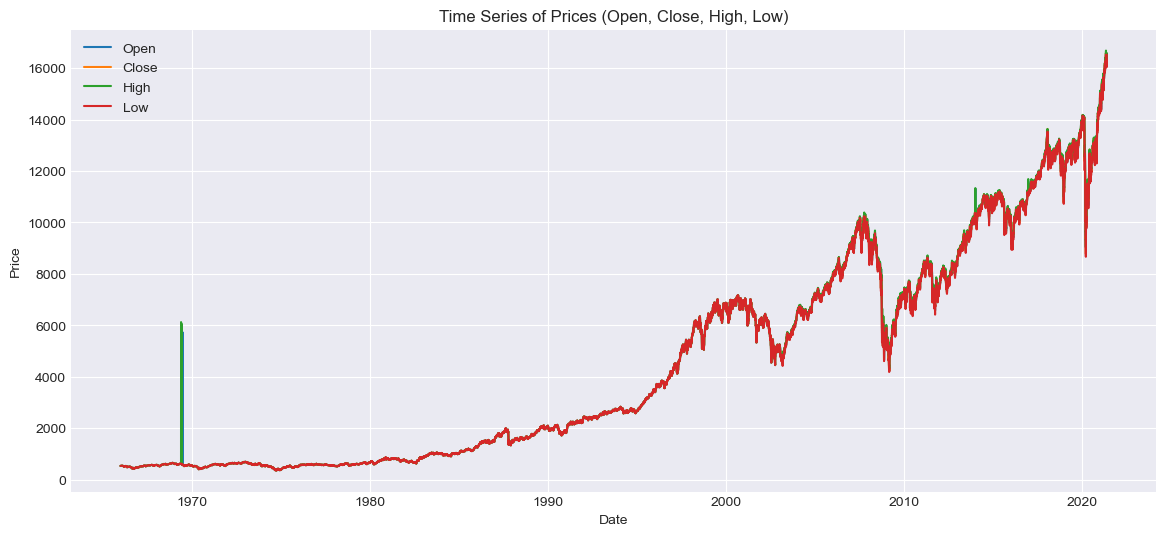

In [84]:
plot_time_series(nya_data, ['Open', 'Close', 'High', 'Low'], 
                 "Time Series of Prices (Open, Close, High, Low)", "Price")

### 2. Scatter Plot: High vs Low

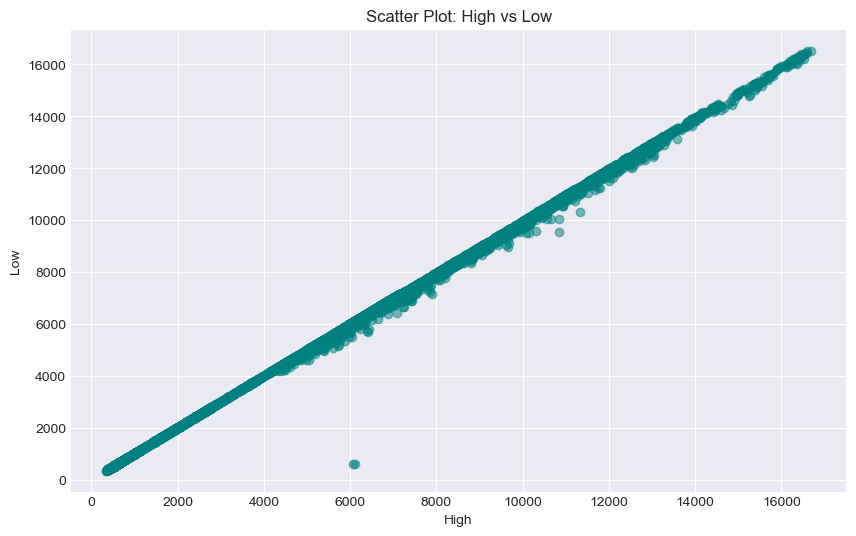

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(nya_data['High'], nya_data['Low'], alpha=0.5, color='teal')
plt.title("Scatter Plot: High vs Low")
plt.xlabel("High")
plt.ylabel("Low")
plt.show()

### 3. Distribution of Close prices

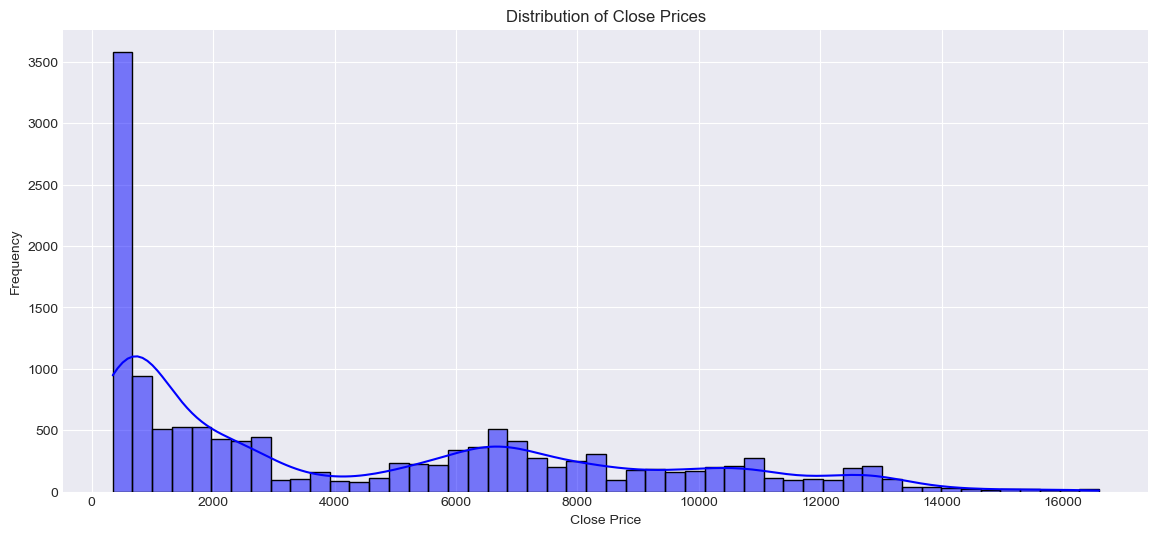

In [86]:
plt.figure(figsize=(14, 6))
sns.histplot(nya_data['Close'].dropna(), bins=50, kde=True, color='blue')
plt.title("Distribution of Close Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

### 4. Rolling Averages of Close Prices (20-day and 50-day)

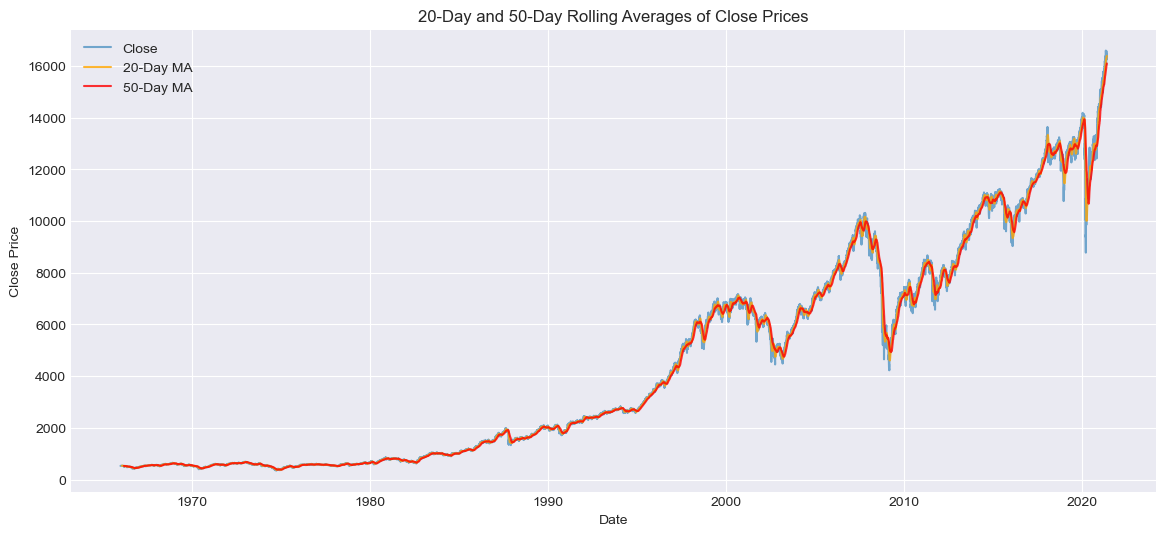

In [87]:
nya_data['Close_20_MA'] = nya_data['Close'].rolling(window=20).mean()
nya_data['Close_50_MA'] = nya_data['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 6))
plt.plot(nya_data['Date'], nya_data['Close'], label="Close", alpha=0.6)
plt.plot(nya_data['Date'], nya_data['Close_20_MA'], label="20-Day MA", color='orange', alpha=0.8)
plt.plot(nya_data['Date'], nya_data['Close_50_MA'], label="50-Day MA", color='red', alpha=0.8)
plt.title("20-Day and 50-Day Rolling Averages of Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

### 5. Correlation heatmap

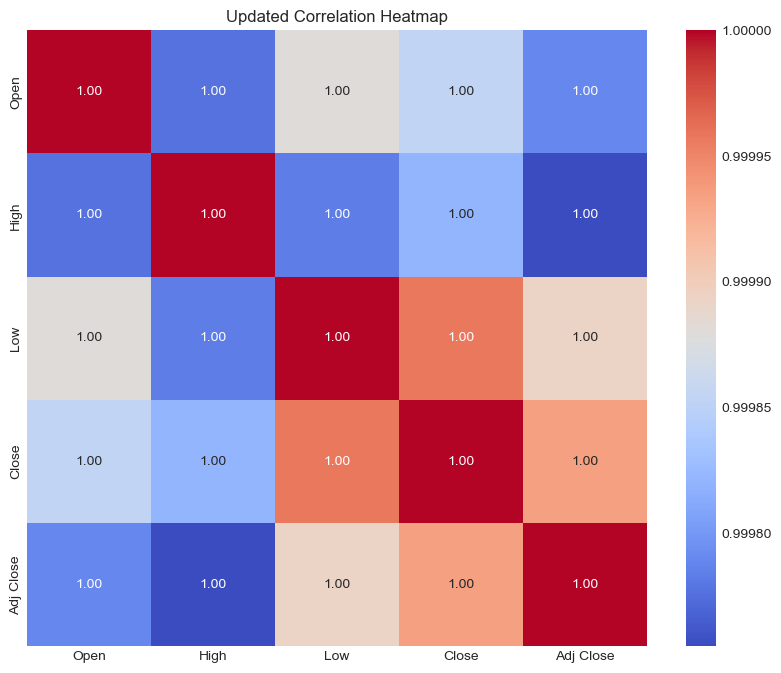

In [88]:
correlation_matrix_updated = nya_data[['Open', 'High', 'Low', 'Close', 'Adj Close']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_updated, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Updated Correlation Heatmap")
plt.show()

### 6. Rolling average (50-day) for Close prices

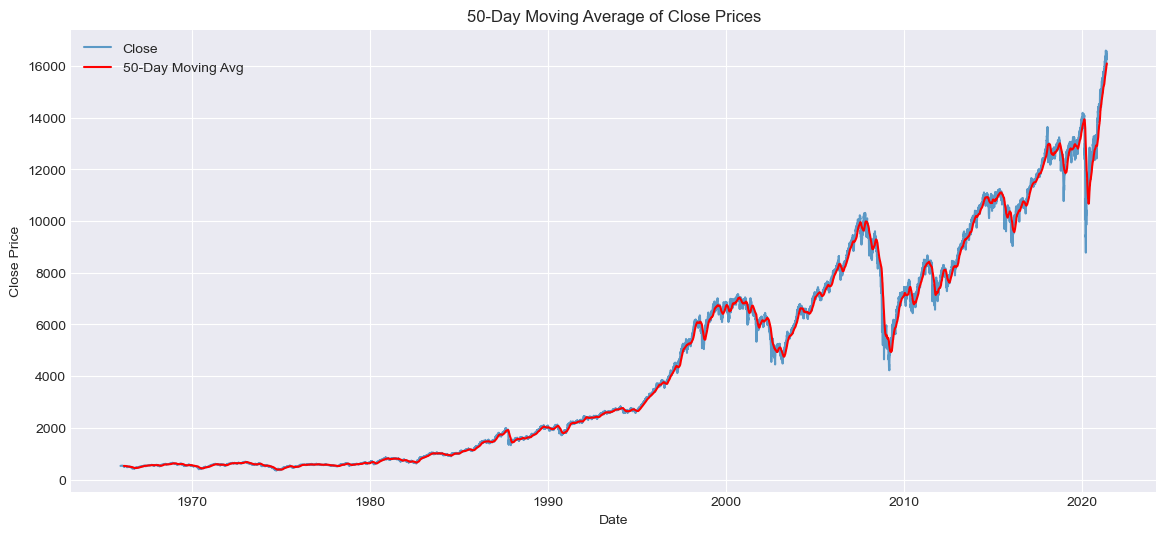

In [89]:
nya_data['Close_50_MA'] = nya_data['Close'].rolling(window=50).mean()
plt.figure(figsize=(14, 6))
plt.plot(nya_data['Date'], nya_data['Close'], label="Close", alpha=0.7)
plt.plot(nya_data['Date'], nya_data['Close_50_MA'], label="50-Day Moving Avg", color='red')
plt.title("50-Day Moving Average of Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

### 7. Candlestick chart

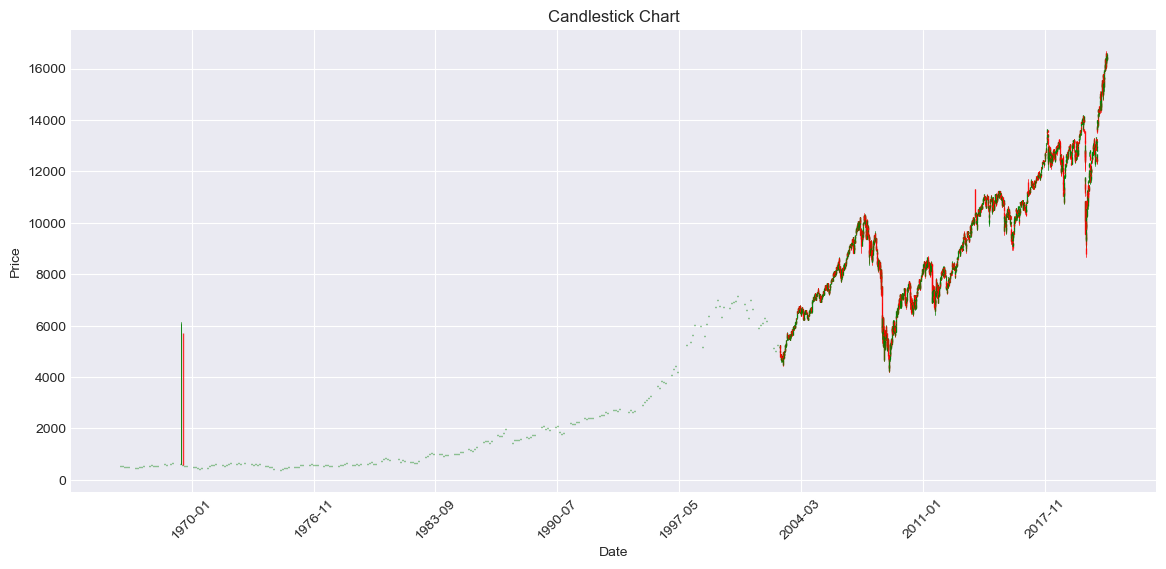

In [90]:
candlestick_data = nya_data[['Date', 'Open', 'High', 'Low', 'Close']].dropna()
candlestick_data['Date'] = candlestick_data['Date'].map(mdates.date2num)

fig, ax = plt.subplots(figsize=(14, 6))
ax.xaxis_date()
candlestick_ohlc(ax, candlestick_data.values, width=0.5, colorup='green', colordown='red', alpha=0.8)
ax.set_title("Candlestick Chart")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
plt.xticks(rotation=45)
plt.show()

### 8. High-Low spread over time

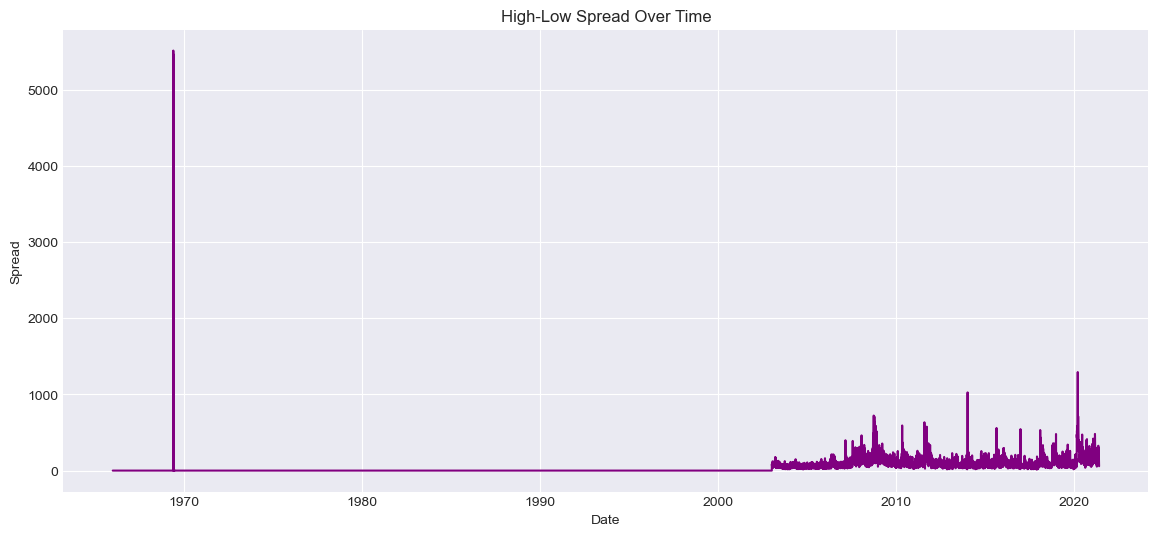

In [91]:
nya_data['High_Low_Spread'] = nya_data['High'] - nya_data['Low']
plt.figure(figsize=(14, 6))
plt.plot(nya_data['Date'], nya_data['High_Low_Spread'], color='purple')
plt.title("High-Low Spread Over Time")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.show()

### 9. Scatter Plot: Adj Close vs Close

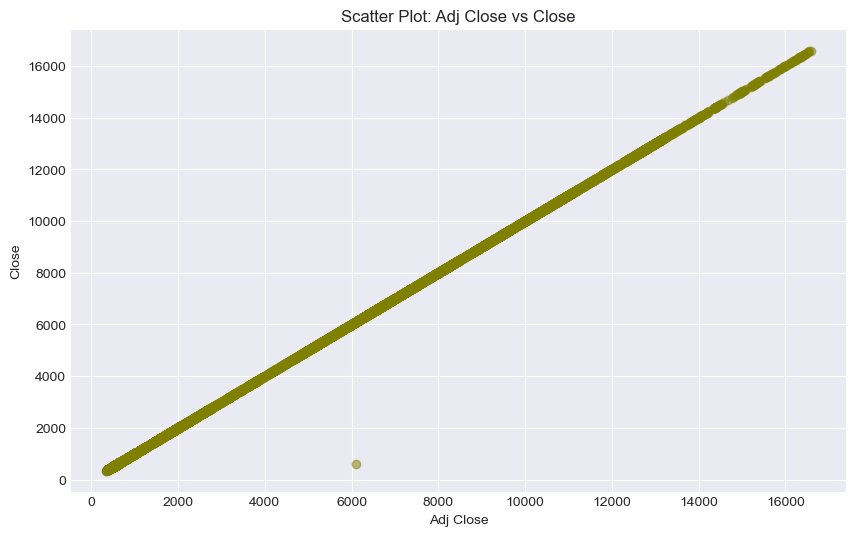

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(nya_data['Adj Close'], nya_data['Close'], alpha=0.5, color='#808000')
plt.title("Scatter Plot: Adj Close vs Close")
plt.xlabel("Adj Close")
plt.ylabel("Close")
plt.show()

### 10. Rolling volatility (Standard Deviation of Close prices - 50-day)

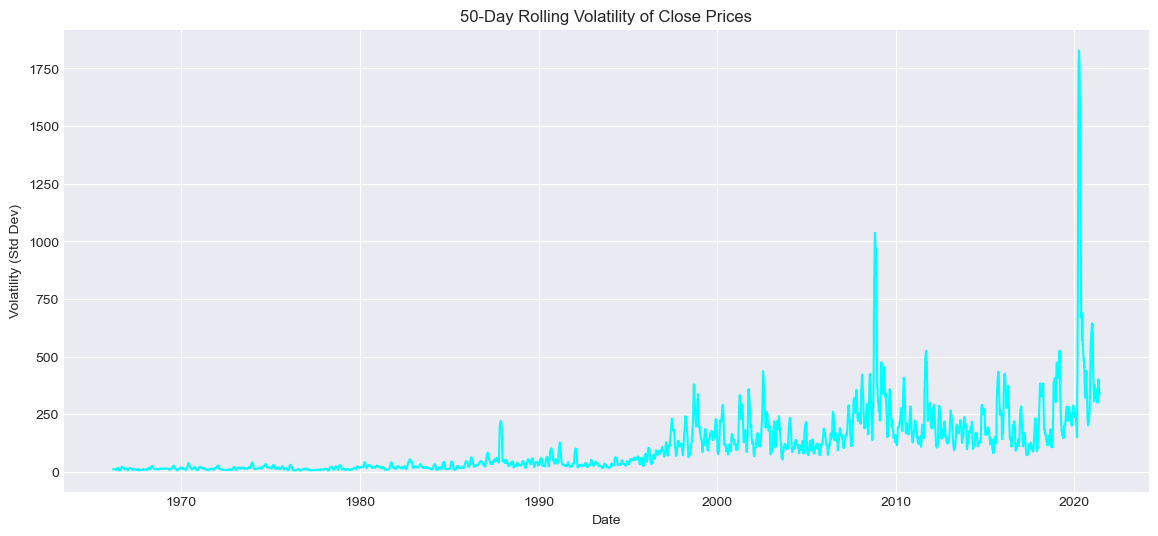

In [93]:
nya_data['Close_50_Rolling_Std'] = nya_data['Close'].rolling(window=50).std()
plt.figure(figsize=(14, 6))
plt.plot(nya_data['Date'], nya_data['Close_50_Rolling_Std'], color='cyan')
plt.title("50-Day Rolling Volatility of Close Prices")
plt.xlabel("Date")
plt.ylabel("Volatility (Std Dev)")
plt.show()

### 11. Pairplot for numerical features

/Users/soroushesnaashari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


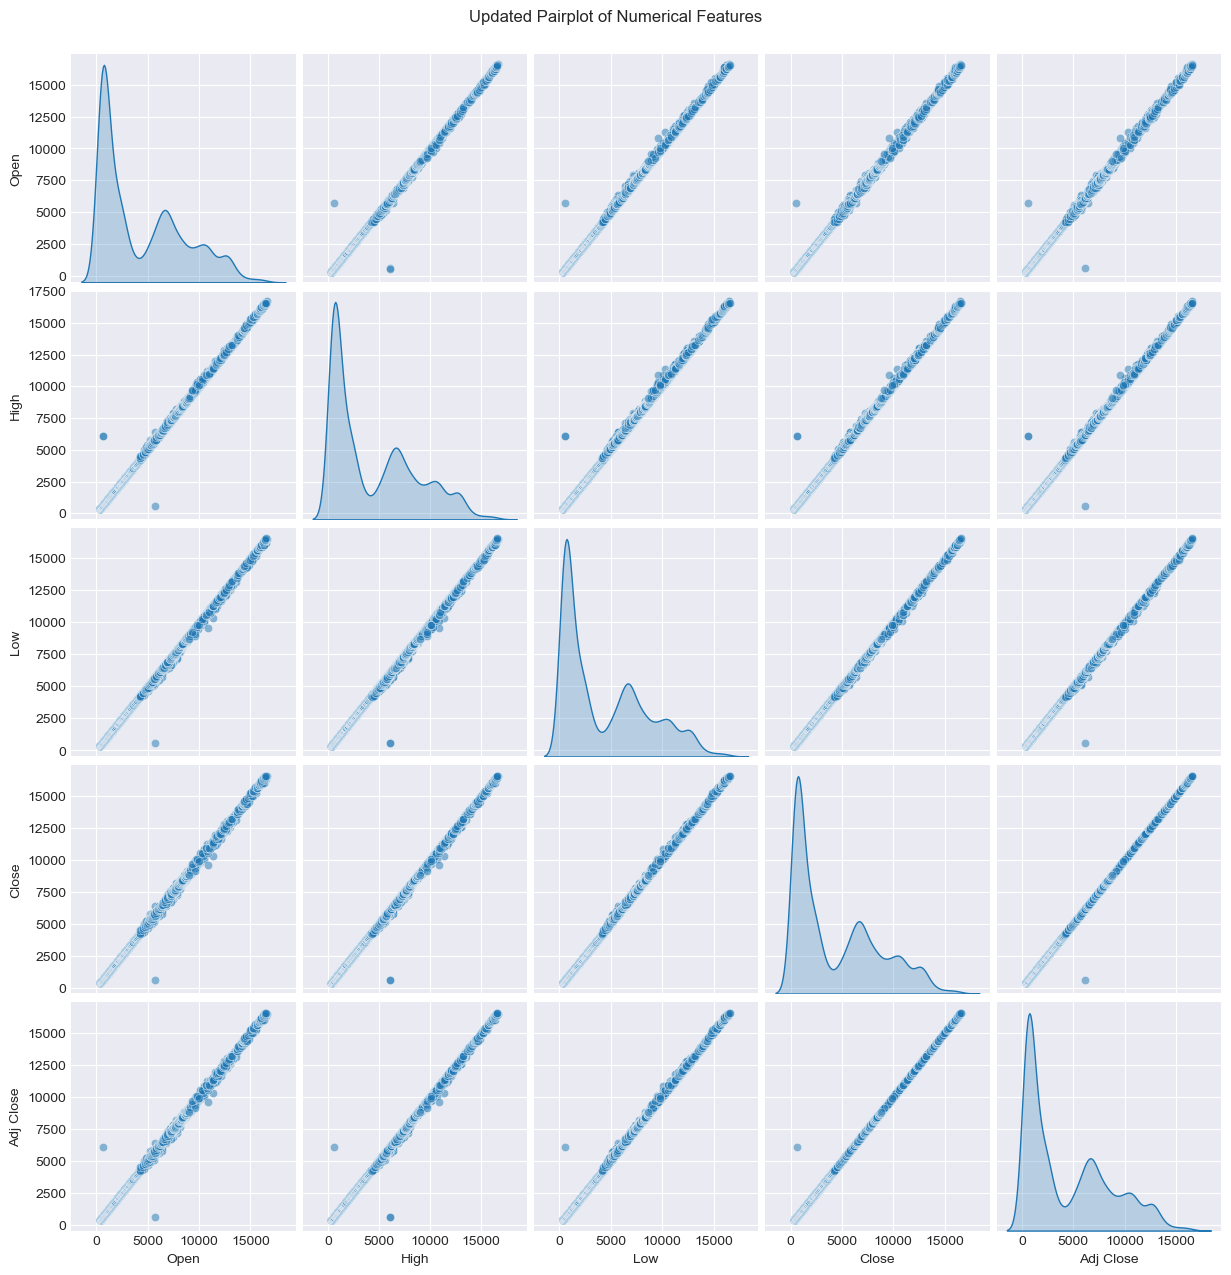

In [94]:
sns.pairplot(nya_data[['Open', 'High', 'Low', 'Close', 'Adj Close']], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Updated Pairplot of Numerical Features", y=1.02)
plt.show()

---

# Noise Detection

### First Noise

In the previous part, the pairplot which was consist of "Open" and "Adj Close" may have two noises which will be evaluated more in the following :

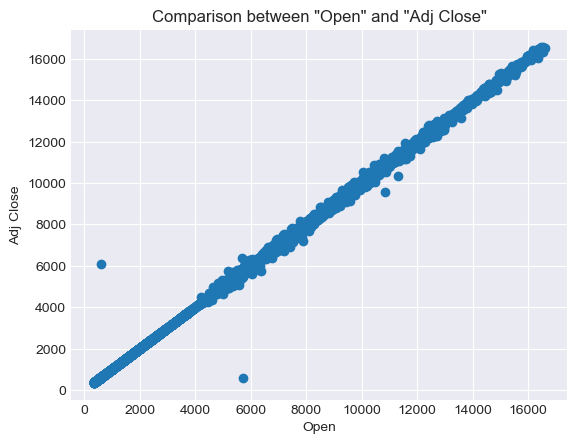

In [95]:
plt.scatter(nya_data["Open"], nya_data["Adj Close"])
plt.xlabel("Open")
plt.ylabel("Adj Close")
plt.title('Comparison between "Open" and "Adj Close"')
plt.show()

In [96]:
# Finding the first noise
first_noise = nya_data[(nya_data["Open"] > 5000) & (nya_data["Adj Close"] < 1000)]
first_noise

,Date,Open,High,Low,Close,Adj Close,Close_20_MA,Close_50_MA,High_Low_Spread,Close_50_Rolling_Std
852,1969-06-30,5722.0,572.0,572.0,572.0,572.0,582.4,601.1,0.0,19.402556


In [98]:
nya_data = nya_data.drop(columns = ["Close_50_MA", "High_Low_Spread", "Close_50_Rolling_Std", "Close_20_MA"])
nya_data

,Date,Open,High,Low,Close,Adj Close
0,1965-12-31,529.0,529.0,529.0,529.0,529.0
1,1966-01-03,527.0,527.0,527.0,527.0,527.0
2,1966-01-04,528.0,528.0,528.0,528.0,528.0
3,1966-01-05,531.0,531.0,531.0,531.0,531.0
4,1966-01-06,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...,...
13943,2021-05-24,16375.0,16509.0,16375.0,16465.0,16465.0
13944,2021-05-25,16465.0,16526.0,16375.0,16390.0,16390.0
13945,2021-05-26,16390.0,16466.0,16388.0,16452.0,16452.0
13946,2021-05-27,16452.0,16546.0,16452.0,16532.0,16532.0


In [99]:
# Run this code again
first_noise = nya_data[(nya_data["Open"] > 5000) & (nya_data["Adj Close"] < 1000)]
first_noise

,Date,Open,High,Low,Close,Adj Close
852,1969-06-30,5722.0,572.0,572.0,572.0,572.0


In [100]:
# Finding the second noise
second_noise = nya_data[(nya_data["Open"] < 1000) & (nya_data["Adj Close"] > 6000)]
second_noise

,Date,Open,High,Low,Close,Adj Close
831,1969-05-29,612.0,612.0,612.0,612.0,6111.0


In [101]:
new_nya_data = nya_data.drop(index = [852, 831])
new_nya_data

,Date,Open,High,Low,Close,Adj Close
0,1965-12-31,529.0,529.0,529.0,529.0,529.0
1,1966-01-03,527.0,527.0,527.0,527.0,527.0
2,1966-01-04,528.0,528.0,528.0,528.0,528.0
3,1966-01-05,531.0,531.0,531.0,531.0,531.0
4,1966-01-06,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...,...
13943,2021-05-24,16375.0,16509.0,16375.0,16465.0,16465.0
13944,2021-05-25,16465.0,16526.0,16375.0,16390.0,16390.0
13945,2021-05-26,16390.0,16466.0,16388.0,16452.0,16452.0
13946,2021-05-27,16452.0,16546.0,16452.0,16532.0,16532.0


### Second Noise

In the plot which was consist of "High" and "Adj Close", noise may be recognised

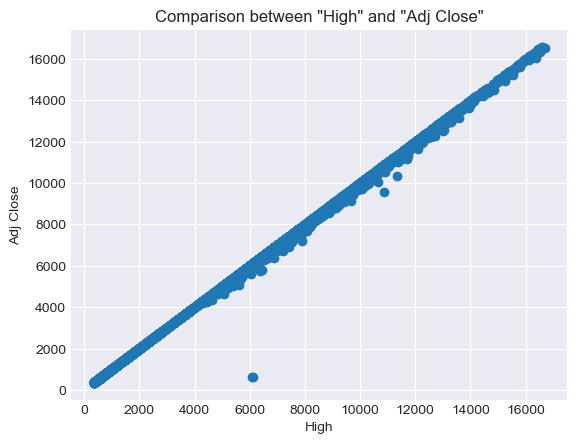

In [102]:
plt.scatter(new_nya_data["High"], new_nya_data["Adj Close"])
plt.xlabel("High")
plt.ylabel("Adj Close")
plt.title('Comparison between "High" and "Adj Close"')
plt.show()

In [103]:
Third_noise = new_nya_data[(new_nya_data["High"] > 6000) & (new_nya_data["Adj Close"] < 1000)]
Third_noise

,Date,Open,High,Low,Close,Adj Close
829,1969-05-27,612.0,6124.0,612.0,612.0,612.0
833,1969-06-03,607.0,6066.0,607.0,607.0,607.0


In [104]:
new1_nya_data = new_nya_data.drop(index = [829, 833])
new1_nya_data

,Date,Open,High,Low,Close,Adj Close
0,1965-12-31,529.0,529.0,529.0,529.0,529.0
1,1966-01-03,527.0,527.0,527.0,527.0,527.0
2,1966-01-04,528.0,528.0,528.0,528.0,528.0
3,1966-01-05,531.0,531.0,531.0,531.0,531.0
4,1966-01-06,532.0,532.0,532.0,532.0,532.0
...,...,...,...,...,...,...
13943,2021-05-24,16375.0,16509.0,16375.0,16465.0,16465.0
13944,2021-05-25,16465.0,16526.0,16375.0,16390.0,16390.0
13945,2021-05-26,16390.0,16466.0,16388.0,16452.0,16452.0
13946,2021-05-27,16452.0,16546.0,16452.0,16532.0,16532.0


### Third Noise

Now it's time to check "Low" with "Adj Close"

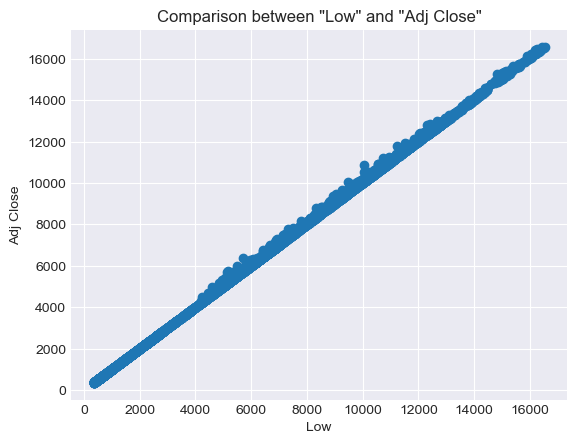

In [105]:
plt.scatter(new1_nya_data["Low"], new1_nya_data["Adj Close"])
plt.xlabel("Low")
plt.ylabel("Adj Close")
plt.title('Comparison between "Low" and "Adj Close"')
plt.show()

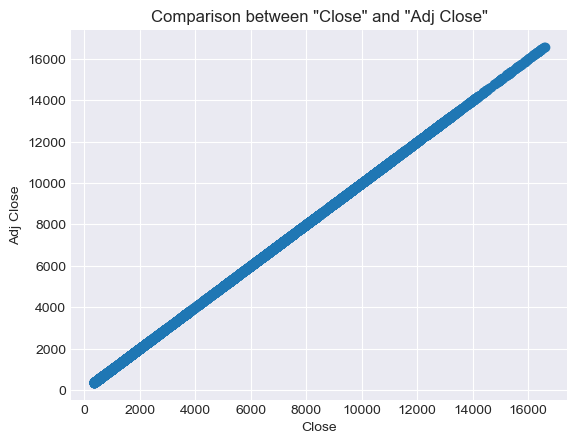

In [107]:
plt.scatter(new1_nya_data["Close"], new1_nya_data["Adj Close"])
plt.xlabel("Close")
plt.ylabel("Adj Close")
plt.title('Comparison between "Close" and "Adj Close"')
plt.show()

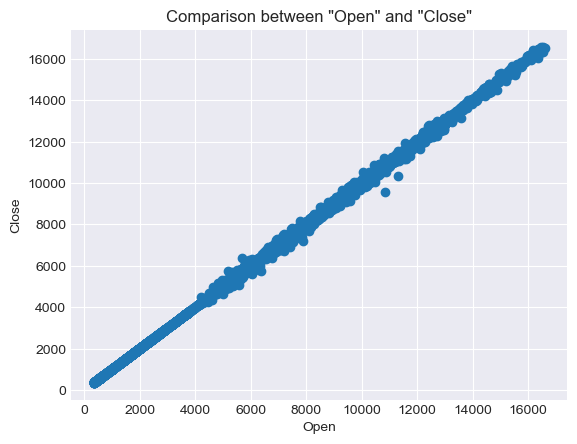

In [108]:
plt.scatter(new1_nya_data["Open"], new1_nya_data["Close"])
plt.xlabel("Open")
plt.ylabel("Close")
plt.title('Comparison between "Open" and "Close"')
plt.show()

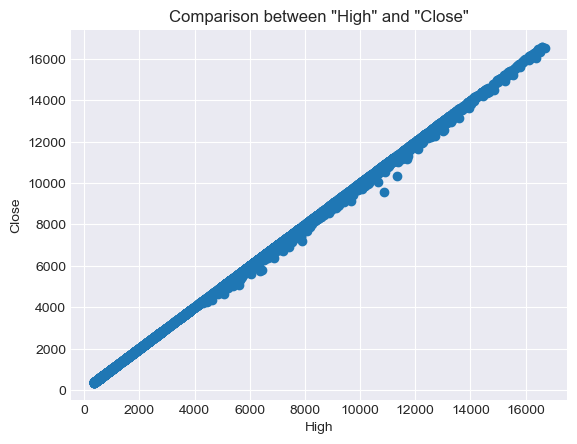

In [109]:
plt.scatter(new1_nya_data["High"], new1_nya_data["Close"])
plt.xlabel("High")
plt.ylabel("Close")
plt.title('Comparison between "High" and "Close"')
plt.show()

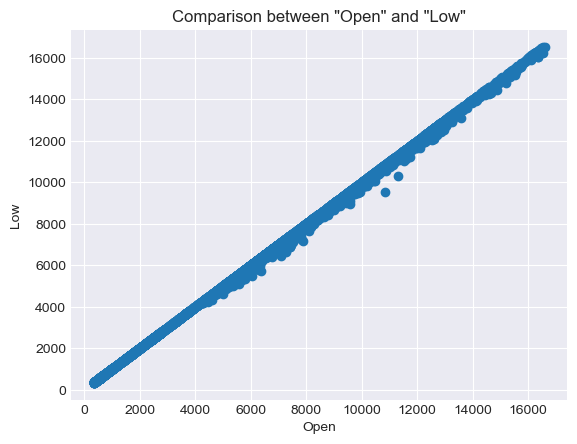

In [110]:
plt.scatter(new1_nya_data["Open"], new1_nya_data["Low"])
plt.xlabel("Open")
plt.ylabel("Low")
plt.title('Comparison between "Open" and "Low"')
plt.show()

**So as it is obvious all the noises were solved and there is no additional noises in our dataset**

---

# Modeling

In [111]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

features = ['Open', 'High', 'Low', 'Adj Close']
target = 'Close'

X = new1_nya_data[features]
y = new1_nya_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

To find out more about choosing between "StandardScaler" or "MinMaxScaler" you can read the article below: https://medium.com/@soroushesnaashari/data-scaling-101-standardscaler-vs-minmaxscaler-in-machine-learning-ff88b7810a48

In [113]:
# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf')
}

In [114]:
# Evaluate models
results = {}
for name, model in models.items():
    # Cross-validation for consistent evaluation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = -np.mean(cv_scores)
    results[name] = mean_cv_score

In [115]:
sorted_results = sorted(results.items(), key=lambda x: x[1])
print("Model Performance (sorted by MSE):")
for model, mse in sorted_results:
    print(f"{model}: MSE = {mse:.2f}")

Model Performance (sorted by MSE):
Linear Regression: MSE = 0.00
Random Forest: MSE = 32.80
Decision Tree: MSE = 44.94
Ridge Regression: MSE = 255.18
KNN Regressor: MSE = 273.12
Gradient Boosting: MSE = 648.99
Lasso Regression: MSE = 2322.60
SVR: MSE = 5250506.63


---

# Investigation

Although as you can find out from the plots that the best algorithm may be **"Linear Regression"**, It seems it might be **overfit**, let's investigate a little bit

### Step 1: Correlation Matrix

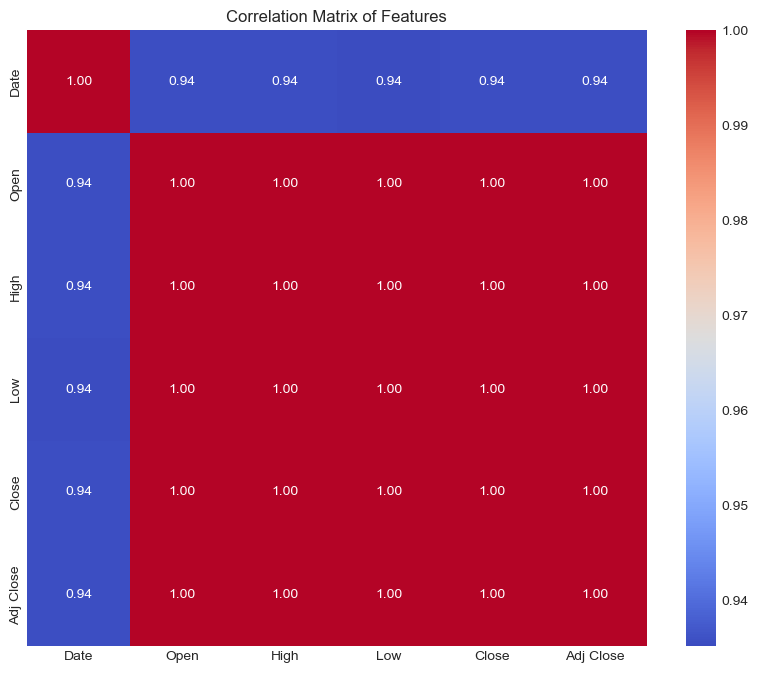

In [116]:
plt.figure(figsize=(10, 8))
correlation_matrix = new1_nya_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

It seems we are in big trouble :)

### Step 2: Train Linear Regression and Analyze Residuals

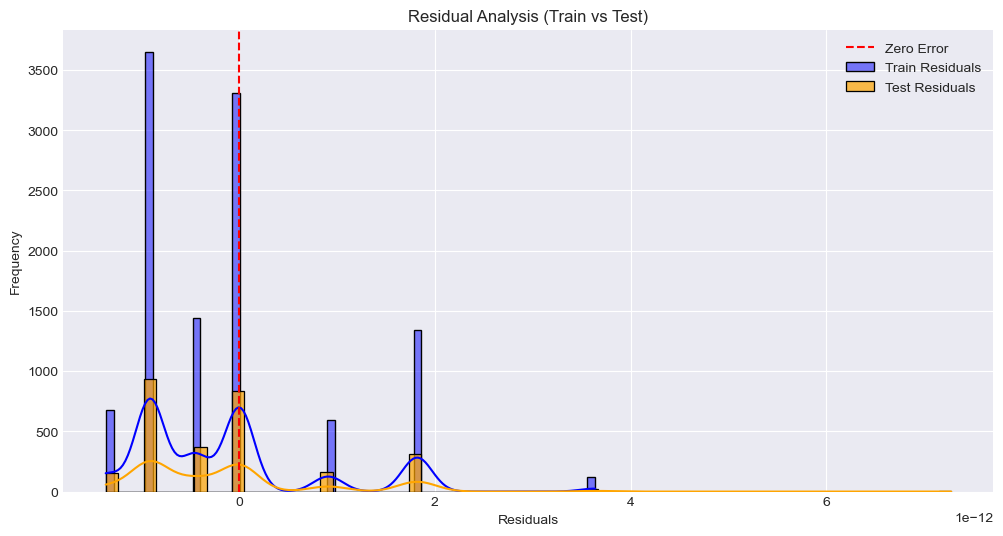

In [117]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(12, 6))
sns.histplot(residuals_train, kde=True, color='blue', label='Train Residuals')
sns.histplot(residuals_test, kde=True, color='orange', label='Test Residuals', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.legend()
plt.title("Residual Analysis (Train vs Test)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### Step 3: Feature Coefficients

In [118]:
coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": linear_model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("Feature Coefficients for Linear Regression:")
print(coefficients)

Feature Coefficients for Linear Regression:
     Feature   Coefficient
3  Adj Close  4.091923e+03
0       Open -4.053625e-12
1       High  2.273737e-12
2        Low  1.250555e-12


Except "Adj Close" other features have nearly zero coefficients, this indicates that these features contribute minimally to the model and "Adj Close" lead the modelling process

### Step 4: Ensure no leakage (target is not used as a feature)

In [119]:
assert target not in features, "Data Leakage Detected: Target column is included as a feature!!!"

So in the **Step 4** as we don't have any results, there isn't any leaked data

### Step 5: Result

**As I can see in these investigations, the model is overfit and I have to think of a way to minimize its chance to be ovefitted. Let's start again with dropping ***"Adj Close"*** due to its influence on our modeling**

---

# Restarted

### Step 1: Remove Adj Close as a Feature

In [120]:
new1_nya_data = new1_nya_data.drop(columns=['Adj Close'])

### Step 2: Check for Multicollinearity Using VIF (Variance Inflation Factor)

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Adding a constant for intercept calculation
X = new1_nya_data.drop(columns=['Date', 'Close'])
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Feature           VIF
0   const      2.246380
1    Open  19072.188208
2    High  13661.449375
3     Low   8054.696247


### Step 3: Regularize the Model (Ridge or Lasso Regression)

In [122]:
X = new1_nya_data.drop(columns=['Date', 'Close'])
y = new1_nya_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)    # alpha value is editable
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Ridge Regression - Train MSE: {train_mse}')
print(f'Ridge Regression - Test MSE: {test_mse}')

Ridge Regression - Train MSE: 441.5017118036359
Ridge Regression - Test MSE: 449.51812892524515


It is not quite well, I have to try another way !

# XGBoost

After some researching I found out about an algorithm called **"XGBoost"** which is an ensemble learning method that tends to perform well with tabular data and can capture complex non-linear relationships, which is particularly useful in financial data like stock prices

In [123]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.3 MB/s eta 0:00:00a 0:00:01


In [124]:
import xgboost as xgb

X = new1_nya_data.drop(columns=['Date', 'Close'])
y = new1_nya_data['Close']

In [125]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

In [127]:
mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost Model MSE: {mse}')

XGBoost Model MSE: 3108.5216758934125


# Tuning Hyperparameter

In [128]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'alpha': [0, 10, 50],  # Regularization parameter
}

In [129]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.01, ma

[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END alpha=0, colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END

[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s


[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END alpha=0, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] EN

[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=

[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=

[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=

[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END alpha=10, colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s


[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=

[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=

[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END alpha=50, colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.

[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=

[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=50, colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'alpha': [0, 10, 50], 'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [130]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

print("Best Parameters:", best_params)
print("Tuned XGBoost Model MSE:", mse_tuned)

Best Parameters: {'alpha': 50, 'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Tuned XGBoost Model MSE: 2592.4901534761643


Although there is an improvment in XGBoost model, it isn't still appropriate and the best result dedicated to **"Ridge Regression"** with **"MSE: 449.51812892524515"**

# The End !!!
**Mohammad Soroush Esnaashari**